# CAP 4910 Heart Disease - PCA

In [1]:
#Source of Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df= pd.read_csv('heart.csv')

In [5]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Heart Disease dataset

### age -
#### age in years
### sex -
#### (1 = male; 0 = female)
### cp-
#### chest pain type
### trestbps-
#### resting blood pressure (in mm Hg on admission to the hospital)
### chol-
#### serum cholestoral in mg/dl
### fbs-
#### (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
### restecg-
#### resting electrocardiographic results
### thalach -
#### maximum heart rate achieved
### exang -
#### exercise induced angina (1 = yes; 0 = no)
### oldpeak-
#### ST depression induced by exercise relative to rest
### slope -
#### the slope of the peak exercise ST segment
### ca -
#### number of major vessels (0-3) colored by flourosopy
### thal -
#### 1 = fixed defect; 2 = normal, 3 = reversable defect


## Describing the dataset

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Make sure there are no nulls in data

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


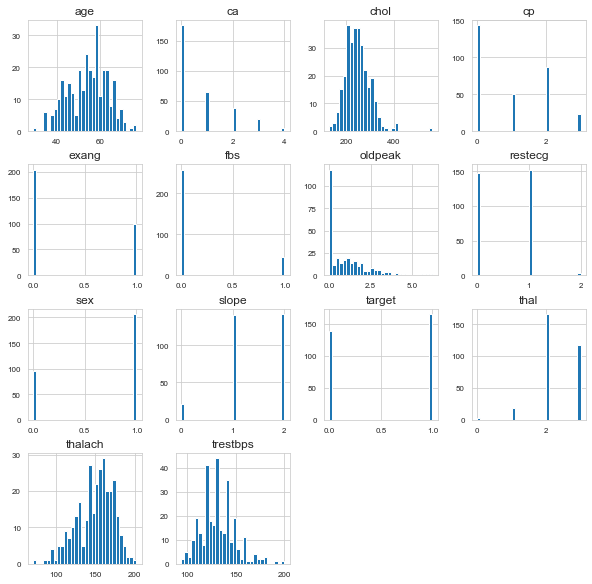

In [10]:
df.hist(figsize=(10, 10), bins=30, xlabelsize=8, ylabelsize=8);

### Using sns to count plot df target.

Text(0.5, 1.0, 'KDE plot for Age vs Cholesterol depend on Type')

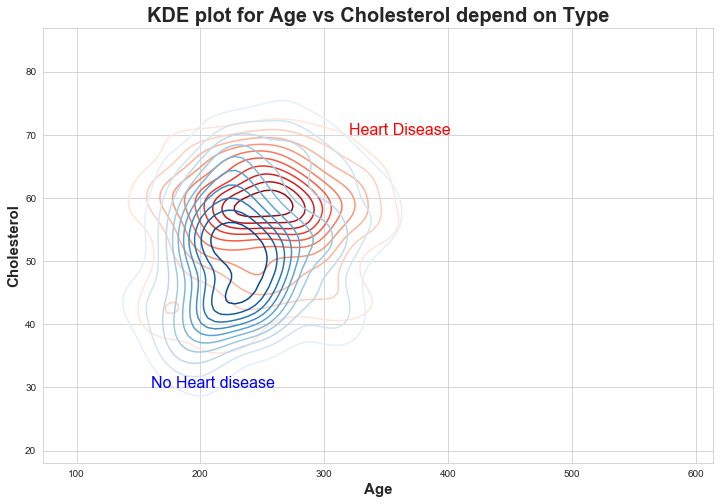

In [16]:
# Set up dataframe for each case
Negative=df[df['target']==0]
Positive=df[df['target']==1]

# Set UP figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.kdeplot(Negative['chol'], Negative['age'],
                 cmap="Reds", shade_lowest=False)
ax = sns.kdeplot(Positive['chol'], Positive['age'],
                 cmap="Blues", shade_lowest=False)

# Label
ax.text(160, 30, "No Heart disease", size=16, color='blue')
ax.text(320, 70, "Heart Disease", size=16, color='red')
ax.set_ylabel("Cholesterol", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel("Age", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_title("KDE plot for Age vs Cholesterol depend on Type", fontdict={'fontsize':20, 'fontweight':'bold'})

In [42]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [43]:
import psycopg2
conn = psycopg2.connect("host=localhost dbname=postgres user=postgres password=Soley123!")

In [44]:
cur = conn.cursor()  #cur object calls executer method. If successful, will return None.

In [45]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [46]:
#Create table. This will make an SQL transaction
cur.execute("""
    CREATE TABLE heartDiseaseTable(
    id SERIAL PRIMARY KEY,
    age integer,
    sex integer,
    cp integer,
    trestbps integer,
    chol integer,
    fbs integer,
    restecg integer,
    thalach integer,
    exang integer,
    oldspeak float,
    slope integer,
    ca integer,
    thal integer,
    target integer
)
""")

DuplicateTable: relation "heartdiseasetable" already exists


In [ ]:
conn.commit() #Commit the data

In [ ]:
csv= df.to_csv('hd.csv')

with open('hd.csv', 'r') as f:
    next(f) # Skip the header row.
    cur.copy_from(f, 'HeartDiseaseTable', sep=',')


In [ ]:
conn.commit()